# Clean And Analyze Employee Exit Surveys

In this study, we will analyze data regarding employees that used to work for the [Department of Eduction, Training and Employment]((https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute, both in Queensland, Australia - but no longer do so. And aim to answer questions like:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?
* What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
* Is there a difference between DETE and TAFE?
* Can we see a trend over the years?

For this study, we'll work with exit surveys of employees of these institutes. You can find the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and for the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey). [Dataquest](https://www.dataquest.io/) made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.). This data can be found [here](https://app.dataquest.io/m/348/guided-project%3A-clean-and-analyze-employee-exit-surveys/1/introduction). (A Dataquest account is required.)

During this study we will combine the results for both surveys, and show the result of the two institutes combined. Be aware that, although both institutes used the same survey template, one of them customized some of the answers.

As you will see over the course of the study, significant data cleaning steps are required first prior to be able to answering our questions. 


## Initial data exploration

Let's start with importing the data, and some initial exploration.
(After several small pieces of codeblocks with their outputs, a summary of observations will follow.)

In [411]:
# Import libraries to be used
import pandas as pd
import numpy as np

# Import data and store as dataframes
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [412]:
# Initial exploration for DETE. Which columns do we have?
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [413]:
# Explore some columns that seem essential for our study
dete_relevant_columns = ['ID', 'SeparationType', 'Cease Date', 'DETE Start Date']
dete_survey[dete_relevant_columns].head(10)

,ID,SeparationType,Cease Date,DETE Start Date
0,1,Ill Health Retirement,08/2012,1984
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated
2,3,Voluntary Early Retirement (VER),05/2012,2011
3,4,Resignation-Other reasons,05/2012,2005
4,5,Age Retirement,05/2012,1970
5,6,Resignation-Other reasons,05/2012,1994
6,7,Age Retirement,05/2012,1972
7,8,Age Retirement,05/2012,1988
8,9,Resignation-Other reasons,07/2012,2009
9,10,Resignation-Other employer,2012,1997


In [414]:
# For these columns, checking for missing values
dete_survey[dete_relevant_columns].isnull().sum()

ID                 0
SeparationType     0
Cease Date         0
DETE Start Date    0
dtype: int64

In [415]:
# Do the same for TAFE. Start with: which columns do we have? 
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [416]:
# Explore some columns that seem essential for our study
tafe_relevant_columns = ['Record ID', 'Reason for ceasing employment', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)']
tafe_survey[tafe_relevant_columns].head(10)

,Record ID,Reason for ceasing employment,LengthofServiceOverall. Overall Length of Service at Institute (in years)
0,6.341330e+17,Contract Expired,1-2
1,6.341337e+17,Retirement,NaN
2,6.341388e+17,Retirement,NaN
3,6.341399e+17,Resignation,NaN
4,6.341466e+17,Resignation,3-4
5,6.341475e+17,Resignation,7-10
6,6.341520e+17,Resignation,3-4
7,6.341537e+17,Resignation,3-4
8,6.341579e+17,Resignation,3-4
9,6.341588e+17,Resignation,1-2


In [417]:
# For these columns, checking for missing values
tafe_survey[tafe_relevant_columns].isnull().sum()

Record ID                                                                      0
Reason for ceasing employment                                                  1
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
dtype: int64

Initial observations - DETE:
* In total 822 records, and 56 columns.
* Multiple columns relate to reasons of 'dissatisfaction'.
* For quite some columns there are missing values. When taking a look at a subset of the 'high level information' columns that seems to be of most interest to start with, there are no missing values though. 
* However, they do need cleaning. E.g. for Start date, sometimes there is a year, sometimes there is 'Not stated'. While for Cease date, sometimes there is a year, sometimes a month and a year.
* The names of many of the columns are lenghty and not well formatted. 

Initial observation - TAFE:
* In total 702 records, and 72 columns.
* Multiple columns relate to reasons of 'dissatisfaction'.
* For quite some columns there are missing values. That includes columns that seem of particular interest to us, like the Overall length of service.
* These most relevant columns may also need further cleaning. E.g. for Overall length of service, entries are in forms like '1-2' and '7-10' which may not be convenient for calculating any statistics.
* The names of many of the columns are lenghty and not well formatted. 

# Data cleaning

In the coming section, we will go through a series of steps to clean, structure and reformat the data. Steps that are required to be able to answer our questions.

For each of these steps, you fill find:
- an explanation what we'll do
- commented code blocks
- and for many steps, some checks to ensure we did what we intended to do

**Null values and column names.** To make our analysis easier, going forward, we will do the following:

 - For DETE, we will eliminate the 'Not Stated' values to be 'null' ('NaN') values. (As that is what they are, in fact.)
 - For both DETE and TAFE, drop a bunch of columns that seem uninteresting to us.


In [418]:
# Reimport DETE data, consider 'Not Stated' a missing value
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

# Check a sample
dete_survey[dete_relevant_columns].head(10)

,ID,SeparationType,Cease Date,DETE Start Date
0,1,Ill Health Retirement,08/2012,1984.0
1,2,Voluntary Early Retirement (VER),08/2012,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0
3,4,Resignation-Other reasons,05/2012,2005.0
4,5,Age Retirement,05/2012,1970.0
5,6,Resignation-Other reasons,05/2012,1994.0
6,7,Age Retirement,05/2012,1972.0
7,8,Age Retirement,05/2012,1988.0
8,9,Resignation-Other reasons,07/2012,2009.0
9,10,Resignation-Other employer,2012,1997.0


In [419]:
# Check whether (and how many) null values there now are for these columns
dete_survey[dete_relevant_columns].isnull().sum()


ID                  0
SeparationType      0
Cease Date         34
DETE Start Date    73
dtype: int64

In [420]:
# For DETE, drop multiple columns (and check the result)
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [421]:
# For TAFE, drop multiple columns (and check the result)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

Looks like we have been succesful. For DETE, we indeed now have 'NaN' values for some of the columns where earlier there were 'Not stated' values.

**Colum names.**
Each dataframe contains many of the same columns, but the column names are different. Because we eventually want to combine the data frames, we'll have to standardize the column names.

In [422]:
# For DETE, make all columns names lower case, remove any trailing spaces, replace spaces by underscores. (And check the result)
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
id                                     822 non-null int64
separationtype                         822 non-null object
cease_date                             788 non-null object
dete_start_date                        749 non-null float64
role_start_date                        724 non-null float64
position                               817 non-null object
classification                         455 non-null object
region                                 717 non-null object
business_unit                          126 non-null object
employment_status                      817 non-null object
career_move_to_public_sector           822 non-null bool
career_move_to_private_sector          822 non-null bool
interpersonal_conflicts                822 non-null bool
job_dissatisfaction                    822 non-null bool
dissatisfaction_with_the_department    822 non-null bool
physical_work_envir

In [423]:
# For TAFE, directly replace some of the columns names to comply with the DETE names. (And check the result.)
tafe_columnnames = {
    'Record ID':'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(tafe_columnnames, axis = 1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
id                                                     702 non-null float64
Institute                                              702 non-null object
WorkArea                                               702 non-null object
cease_date                                             695 non-null float64
separationtype                                         701 non-null object
Contributing Factors. Career Move - Public Sector      437 non-null object
Contributing Factors. Career Move - Private Sector     437 non-null object
Contributing Factors. Career Move - Self-employment    437 non-null object
Contributing Factors. Ill Health                       437 non-null object
Contributing Factors. Maternity/Family                 437 non-null object
Contributing Factors. Dissatisfaction                  437 non-null object
Contributing Factors. Job Dissatisfaction              437 non-null 

In [424]:
# DETE confirm the data looks good still
dete_survey_updated.head(5)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [425]:
# TAFE confirm the data looks good still
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Looks like this was successful. Both dataframes now have the same column headers for some of the most relevant data.

**Get rid of irrelevant rows.** If we look at the data in the column 'separationtype' (see samples above) we can see that in addition to 'resignation' there are other reasons why employment ends, e.g. retirement. We want to focus only on employees who resigned though, so let's get rid of the other rows.

In [426]:
# For DETE check which reasons to cease employment are in the data
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [427]:
# Only keep the rows that contain 'Resignation' in separationtype
dete_resignationrowspattern = r"Resignation"
# Create a new dataframe, ensure it is 'copy' to avoid SettingWithCopyWarning later on
dete_resignation = dete_survey_updated[dete_survey_updated['separationtype'].str.contains(dete_resignationrowspattern)].copy()
# Check which rows are left 
dete_resignation['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [428]:
# And double-check by looking at some entries
dete_resignation.head(5)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [429]:
# Also for TAFE check which reasons to cease employment are in the data
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [430]:
# Only keep the rows for which sepationtype is 'Resignation'
# Create a new dataframe, ensure it is 'copy' to avoid SettingWithCopyWarning later on
tafe_resignation = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
# Check which rows are left 
tafe_resignation['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

In [431]:
# Check some entries
tafe_resignation.head(5)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


Looks like we've been successful, and have now data frames for both DETE and TAFE that only contain records for employees that resigned.

**Data sanity check.** Let us next check if the values that we now have left for Start date and Cease date are sensible.

In [432]:
# Get the different values for Start date, and their frequencies (DETE)
dete_resignation['dete_start_date'].astype(pd.Int32Dtype()).value_counts().sort_index()

1963     1
1971     1
1972     1
1973     1
1974     2
1975     1
1976     2
1977     1
1980     5
1982     1
1983     2
1984     1
1985     3
1986     3
1987     1
1988     4
1989     4
1990     5
1991     4
1992     6
1993     5
1994     6
1995     4
1996     6
1997     5
1998     6
1999     8
2000     9
2001     3
2002     6
2003     6
2004    14
2005    15
2006    13
2007    21
2008    22
2009    13
2010    17
2011    24
2012    21
2013    10
Name: dete_start_date, dtype: int64

In [433]:
# Get the different values for Cease date, and their frequencies (DETE)
dete_resignation['cease_date'].value_counts().sort_index()

01/2014     22
05/2012      2
05/2013      2
06/2013     14
07/2006      1
07/2012      1
07/2013      9
08/2013      4
09/2010      1
09/2013     11
10/2013      6
11/2013      9
12/2013     17
2010         1
2012       126
2013        74
Name: cease_date, dtype: int64

In [434]:
# Get the years only
dete_resignation['cease_date'].astype(str).str[-4:].astype(float).value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [435]:
# Get the different values for Cease date, and their frequencies (TAFE)
tafe_resignation['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

Start years are in the range from 1963 to 2013, and cease years from 2006 to 2014. That all looks okay, it doesn't give  reason to delete any further records.

**Calculate years of service**. For all records, we want to know the 'years of service' before the employee retired. For TAFE we already have this information (in a field that we renamed to `institute_service`. For DETE we can easily add such column as well, by calculating the difference between cease date and start date.

In [436]:
# Subtract cease date from start date
dete_resignation['institute_service']= dete_resignation['cease_date'].astype(str).str[-4:].astype(float) - dete_resignation['dete_start_date']


In [437]:
# Check what values we have as a result
dete_resignation['institute_service'].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

Looks like reasonable values, with quite a lot of records in the range 0-10 years, and less above. Up to one employee with an impressive 49 years of service!

**Identify dissatisfaction** Next, for all records, let us figure out whether the reason to leave was actually 'dissatisfaction'. For both DETE and TAFE, what we will do is add an additional column `dissatisfied` to the dataframe. For every record, we will set this to `True` in case we have reason to believe that this employee left due to dissatisfaction, given the entries in already existing columns.

In [438]:
# For DETE, identify the columns that appear to indicate dissatisfaction
dete_dissatisfaction_columns = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment',
                                'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions',
                                'work_life_balance', 'workload']

# Have a look what data is in these columns.
dete_resignation[dete_dissatisfaction_columns].head(10)

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False
14,True,True,False,False,False,False,False,False,False
16,False,False,False,True,False,False,False,False,False
20,False,False,False,False,False,False,False,False,False
21,False,False,False,False,False,False,False,False,False


In [439]:
# Add the new 'dissatisfied' column, and set it to True if at least one of these columns is True
dete_resignation['dissatisfied'] = dete_resignation[dete_dissatisfaction_columns].any(axis=1, skipna=False)

In [440]:
# Check the result
dete_dissatisfaction_columns_inclnew = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment',
                                'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions',
                                'work_life_balance', 'workload', 'dissatisfied']
dete_resignation[dete_dissatisfaction_columns_inclnew].head(10)

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload,dissatisfied
3,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,True
8,False,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False,True
11,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False
14,True,True,False,False,False,False,False,False,False,True
16,False,False,False,True,False,False,False,False,False,True
20,False,False,False,False,False,False,False,False,False,False
21,False,False,False,False,False,False,False,False,False,False


Looking at the sample, it looks like for DETE we have correctly filled the new 'dissatisfied' column.
Let's continue with TAFE.

In [441]:
# Let's take a look at the data in the columns that indicate dissatisfaction.
print (tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts())
print (tafe_resignation['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [442]:
# Let's update the values in these columns to True, False and NaN.
# Create a function that will translate '-' to False and other entries to True
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif (value == '-' or value == False): # add the 'value == False' clause so this cell can safely be run more than once
        return False
    else:
        return True

# Apply this function to the relevant columns
tafe_dissatisfaction_columns = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignation[tafe_dissatisfaction_columns] = tafe_resignation[tafe_dissatisfaction_columns].applymap(update_vals)

# Check the result
print (tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts())
print (tafe_resignation['Contributing Factors. Job Dissatisfaction'].value_counts())

False    277
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
False    270
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [443]:
# Add the new 'dissatisfied' column, and set it to True if at least one of these columns is True
tafe_resignation['dissatisfied'] = tafe_resignation[tafe_dissatisfaction_columns].any(axis=1, skipna=False)

In [444]:
# Check the result
tafe_dissatisfaction_columns_inclnew = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction', 'dissatisfied']
tafe_resignation[tafe_dissatisfaction_columns_inclnew].head(20)

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,dissatisfied
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False
10,False,False,False
13,False,False,False
14,True,True,True


Looking at the sample, it looks like it that also for TAFE we have correctly filled the new 'dissatisfied' column.

In [445]:
# To avoid future issues, let's make copies of the dataframes
dete_resignation_up = dete_resignation.copy()
tafe_resignation_up = tafe_resignation.copy()

**Combine the dataframes**. Both dataframes now contains the columns that we need for our analysis, with the same names and same format of entries. So let's combine them into one dataframe now. Result should be a dataframe:
- with a row count that is the sum of the row counts of DETE and TAFE  
- in terms of columns the 'superset' of the the columns of both dataframes; where for those that exist in both there is only one of them in the new dataframe
- and having one additional column from which we can read where this row originated from (DETE or TAFE)

We will do a couple of check to ensure we indeed got that result.

In [446]:
# Check current columns in DETE
dete_resignation_up.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'dissatisfied'],
      dtype='object')

In [447]:
# Check current columns in TAFE
tafe_resignation_up.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'dissatisfied'],
      dtype='object')

In [448]:
# Identify how many rows and columns there are in for DETE and TAFE dataframes
print ('DETE rows and columns', dete_resignation_up.shape)
print ('TAFE rows and columns', tafe_resignation_up.shape)
# And count what is in the 'dissatisfied' column for both
print ('DETE dissatisfied counts', dete_resignation_up['dissatisfied'].value_counts())
print ('TAFE dissatisfied counts', tafe_resignation_up['dissatisfied'].value_counts())

DETE rows and columns (311, 37)
TAFE rows and columns (340, 24)
DETE dissatisfied counts False    162
True     149
Name: dissatisfied, dtype: int64
TAFE dissatisfied counts False    241
True      91
Name: dissatisfied, dtype: int64


In [449]:
# Add a column so we can later identify the source of each record
dete_resignation_up['institute'] = 'DETE'
tafe_resignation_up['institute'] = 'TAFE'

In [450]:
# Combine the two dataframes (create a new dataframe)
combined = pd.concat([dete_resignation_up, tafe_resignation_up], sort = False)

In [451]:
# Check 1: number of rows should be 311 + 340 = 651
# Check 2: number of columns should be a bit below 38 + 25 = 63. Somewhat 'below 63', as some columns (with the same name exist in both.)
print ('COMBINED rows and columns', combined.shape)

COMBINED rows and columns (651, 53)


In [452]:
# Check 3: there should be 311 DETE entries and 340 TAFE entries
combined['institute'].value_counts()

TAFE    340
DETE    311
Name: institute, dtype: int64

In [453]:
# Check 4: for 'dissatisfied', there should be 149 + 91 = 240 True entries, and 162 + 241 = 403 False entries
combined['dissatisfied'].value_counts()

False    403
True     240
Name: dissatisfied, dtype: int64

In [454]:
# Check 5: columns should be the superset of DETE and TAFE columns, while columns like 'separationtype' or 'cease_date' should exist only once as they existed in both.
combined.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'dissatisfied',
       'institute', 'Institute', 'WorkArea',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       

In [455]:
# Check 6: for one 'combined' column, the value counts are the combination of what was in DETE and what was in TAFE
print ('TAFE: ',tafe_resignation_up['separationtype'].value_counts())
print ('DETE: ',dete_resignation_up['separationtype'].value_counts())
print ('Combined: ', combined['separationtype'].value_counts())

TAFE:  Resignation    340
Name: separationtype, dtype: int64
DETE:  Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64
Combined:  Resignation                             340
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64


All checks successful, so it looks like we created what we wanted. Let's further check what we have now.

In [456]:
# Combined: which columns, and how many entries
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 53 columns):
id                                                     651 non-null float64
separationtype                                         651 non-null object
cease_date                                             635 non-null object
dete_start_date                                        283 non-null float64
role_start_date                                        271 non-null float64
position                                               598 non-null object
classification                                         161 non-null object
region                                                 265 non-null object
business_unit                                          32 non-null object
employment_status                                      597 non-null object
career_move_to_public_sector                           311 non-null object
career_move_to_private_sector                          311 non-null 

In [457]:
# Quite a few of these columns are less interesting for our analysis question, in particular those that only existed in one of the dataframes only. Looks like we are good if we only keep those columns that have at least 500 entries.
combined_updated = combined.dropna(axis='columns', thresh = 500).copy()

In [458]:
# Check the result
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
id                   651 non-null float64
separationtype       651 non-null object
cease_date           635 non-null object
position             598 non-null object
employment_status    597 non-null object
gender               592 non-null object
age                  596 non-null object
institute_service    563 non-null object
dissatisfied         643 non-null object
institute            651 non-null object
dtypes: float64(1), object(9)
memory usage: 55.9+ KB


**Clean-up years-of-service**. We will want to do an analysis using the years-of-service column (`institute_service`). Having seen the data earlier though, it seems that next to values representing a number years, it also contains values like '7-10'.

Then, to facilitate our analysis, we will rather want to put these numbers into categories that represent 'career stages' that employees go throught. Refer [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument why that is more effective than looking at individual years-of-service.

We'll use these slightly modified definitions:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

What we will do, is assess what values we have in the `institute_service` column, clean those up where needed, and create a new column `service_cat` that we fill with the career stage.

In [459]:
# Assess current values for 'institute_service'
combined_updated['institute_service'].unique()

array([7.0, 18.0, 3.0, 15.0, 14.0, 5.0, nan, 30.0, 32.0, 39.0, 17.0, 9.0,
       6.0, 1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0, 8.0, 2.0, 0.0,
       23.0, 13.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0, 22.0, 28.0, 49.0,
       11.0, 41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0, '3-4', '7-10',
       '1-2', 'Less than 1 year', '11-20', '5-6', 'More than 20 years'],
      dtype=object)

In [460]:
# Convert to string so we can clean it up
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)

In [461]:
# For the 'ranges' that we see (e.g. 11-20), take the lower value as those match with the to-be-used categories
combined_updated['institute_service'] = combined_updated['institute_service'].str.split('-').str[0]

In [462]:
# Check whether that was successful
combined_updated['institute_service'].unique()

array(['7.0', '18.0', '3.0', '15.0', '14.0', '5.0', 'nan', '30.0', '32.0',
       '39.0', '17.0', '9.0', '6.0', '1.0', '35.0', '38.0', '36.0',
       '19.0', '4.0', '26.0', '10.0', '8.0', '2.0', '0.0', '23.0', '13.0',
       '16.0', '12.0', '21.0', '20.0', '24.0', '33.0', '22.0', '28.0',
       '49.0', '11.0', '41.0', '27.0', '42.0', '25.0', '29.0', '34.0',
       '31.0', '3', '7', '1', 'Less than 1 year', '11', '5',
       'More than 20 years'], dtype=object)

In [463]:
# Replace 'Less than 1 year' by '0' (which will place this in the correct category)
combined_updated['institute_service'] = combined_updated['institute_service'].str.replace('Less than 1 year','0')
# Replace 'More than 20 years' by '20' (which will place this in the correct category)
combined_updated['institute_service'] = combined_updated['institute_service'].str.replace('More than 20 years','20')

In [464]:
# Check whether that was successful
combined_updated['institute_service'].unique()

array(['7.0', '18.0', '3.0', '15.0', '14.0', '5.0', 'nan', '30.0', '32.0',
       '39.0', '17.0', '9.0', '6.0', '1.0', '35.0', '38.0', '36.0',
       '19.0', '4.0', '26.0', '10.0', '8.0', '2.0', '0.0', '23.0', '13.0',
       '16.0', '12.0', '21.0', '20.0', '24.0', '33.0', '22.0', '28.0',
       '49.0', '11.0', '41.0', '27.0', '42.0', '25.0', '29.0', '34.0',
       '31.0', '3', '7', '1', '0', '11', '5', '20'], dtype=object)

In [465]:
# Now all values are numbers as such, convert to float
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)

In [466]:
# Check the result
combined_updated['institute_service'].unique()

array([ 7., 18.,  3., 15., 14.,  5., nan, 30., 32., 39., 17.,  9.,  6.,
        1., 35., 38., 36., 19.,  4., 26., 10.,  8.,  2.,  0., 23., 13.,
       16., 12., 21., 20., 24., 33., 22., 28., 49., 11., 41., 27., 42.,
       25., 29., 34., 31.])

Now let's define a function that will assign each of these values for years-of-service to a category, and add the new column to our dataframe



In [467]:
# Define function
def map_years_to_category (years):
    if pd.isnull(years):
        return '9. Unknown'   # in case years-of-service is unknown, let's make it 'Unknown'
    elif years < 3:
        return '1. New'
    elif years < 7:
        return '2. Experienced'
    elif years < 11:
        return '3. Established'
    else:
        return '4. Veteran'

In [468]:
# Create the new category
combined_updated['service_cat'] = combined_updated['institute_service'].apply(map_years_to_category)

In [469]:
# Check the result on a sizeable data sample (so it includes several categories, and a NaN example too)
combined_updated.head(20)                     

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
3,4.0,Resignation-Other reasons,05/2012,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,3. Established
5,6.0,Resignation-Other reasons,05/2012,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,4. Veteran
8,9.0,Resignation-Other reasons,07/2012,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,2. Experienced
9,10.0,Resignation-Other employer,2012,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,4. Veteran
11,12.0,Resignation-Move overseas/interstate,2012,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,2. Experienced
12,13.0,Resignation-Other reasons,2012,Teacher,Permanent Full-time,Female,36-40,14.0,False,DETE,4. Veteran
14,15.0,Resignation-Other employer,2012,Teacher,Permanent Full-time,Male,31-35,5.0,True,DETE,2. Experienced
16,17.0,Resignation-Other reasons,2012,Teacher Aide,Permanent Part-time,Male,61 or older,NaN,True,DETE,9. Unknown
20,21.0,Resignation-Other employer,2012,Teacher,Permanent Full-time,Male,56-60,30.0,False,DETE,4. Veteran
21,22.0,Resignation-Other reasons,2012,Cleaner,Permanent Part-time,Female,51-55,32.0,False,DETE,4. Veteran


That looks good, for all rows in this sample the career stage (`service_cat`) was filled correctly.

**Replace 'null' values.**  We need to do one final piece of data cleanup still, as for the `dissatisfied` column we may have 'null' values still. (Which cannot be handled in the pivot table that we will create later.)

In [470]:
# Check what is in the `dissatisfied` column
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

So we have 8 'unknown' values. Since there is a majority of 'False' values, and as it sounds a bit unfair anyway to mark people as the 'dissatisfied' unless they explicitly stated that they are, let's replace them by 'False'.

In [471]:
# Replace 'NaN' by False in the 'dissatisfied' column
combined_updated['dissatisfied'].fillna(False, inplace = True)

In [472]:
# Check the result
combined_updated['dissatisfied'].value_counts(dropna = False)

False    411
True     240
Name: dissatisfied, dtype: int64

## Analysis

So for every record, we now have:

- a category representing the career stage
- an indicator (Boolean) whether this person left out of dissatisfaction

That means that we are now ready to do the analysis as stated in the Introduction. We'll create a pivot-table first, and then a chart to show the results.

In [473]:
# Create a pivot table. Use the career stage ('service_cat') as index. We'll use the 'dissatisfied' as values, and take the average.
# Since dissatisfied is 1 in case of True and 0 in case of False, that immediately gives  the fraction of dissatisfied people.
dissatisfaction_per_career_stage = combined_updated.pivot_table(values = 'dissatisfied', index = 'service_cat', aggfunc = 'mean')

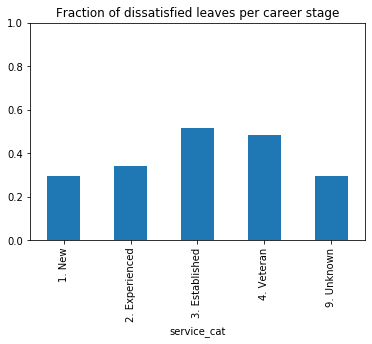

In [474]:
# Enable plots within notebook
%matplotlib inline
# Plot a bar chart
dissatisfaction_per_career_stage.plot(kind = 'bar', ylim = (0,1), title = 'Fraction of dissatisfied leaves per career stage', legend = False)

Before we draw conclusions, let's do a quick check for one of the values whether correct.

In [475]:
# Get number of entries per category
combined_updated['service_cat'].value_counts().sort_index()

1. New            193
2. Experienced    172
3. Established     62
4. Veteran        136
9. Unknown         88
Name: service_cat, dtype: int64

In [476]:
# For one of the career stage categories, let us calculate the fraction. 
onlynew= combined_updated[combined_updated['service_cat']=='1. New']
onlynew['dissatisfied'].value_counts()

False    136
True      57
Name: dissatisfied, dtype: int64

In [477]:
# 193 entries for '1. New' indeed. Calculate the fraction that is dissatisfied.
+57/(136+57)

0.29533678756476683

That's the same value as we see in the graph, so that looks correct.

What we can observe from the graph, is that people in the earlier stages of their career leave dissatisfied in 30-40% of cases. In later career stages, this grows to around 50%.

Let's now take a look whether there is a difference between DETE and TAFE.

In [478]:
# Create a new pivot_table, where 'institute' moves from being a row to being a column, and still aggregating dissatisfaction
dissatisfaction_per_career_stage_per_institute = combined_updated.pivot_table(values = 'dissatisfied', index = ['service_cat', 'institute'], aggfunc = 'mean').unstack()

In [479]:
# Show the result as a table
dissatisfaction_per_career_stage_per_institute

dissatisfied          
institute              DETE      TAFE
service_cat                          
1. New             0.375000  0.262774
2. Experienced     0.460526  0.250000
3. Established     0.609756  0.333333
4. Veteran         0.560000  0.277778
9. Unknown         0.315789  0.280000

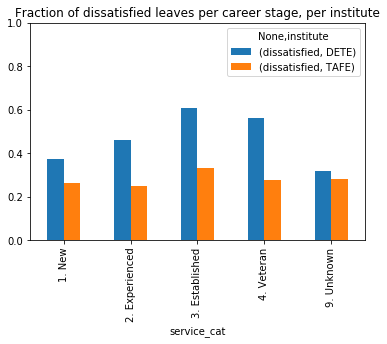

In [480]:
# Plot a bar chart
dissatisfaction_per_career_stage_per_institute.plot(kind = 'bar', ylim = (0,1), title = 'Fraction of dissatisfied leaves per career stage, per institute')

That's quite a significant difference! For all career stages, leaving out of dissatisfaction is much more common at DETE then at TAFE. Up to over 60% for 'Established' employees.

Let's now analyze whether there is any trend over the years.

In [481]:
# Since we are going to change some data, let's create a copy first
combined_updated_v2 = combined_updated.copy()

In [482]:
# Check the different values that we have for cease_date (and how many of them)
combined_updated_v2['cease_date'].value_counts(dropna = False)

2012       126
2011.0     116
2012.0      94
2013        74
2010.0      68
2013.0      55
01/2014     22
12/2013     17
NaN         16
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
2009.0       2
05/2013      2
07/2006      1
09/2010      1
2010         1
07/2012      1
Name: cease_date, dtype: int64

In [483]:
# Remove the rows for which we don't now the cease_date
combined_updated_v2 = combined_updated_v2[pd.notnull (combined_updated_v2['cease_date'])]

In [484]:
# Check the result (should not contain NaN anymore)
combined_updated_v2['cease_date'].value_counts(dropna = False)

2012       126
2011.0     116
2012.0      94
2013        74
2010.0      68
2013.0      55
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
2009.0       2
05/2012      2
05/2013      2
09/2010      1
2010         1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

In [485]:
# Since we want to look at this per year, create a new column that only contains the year of the cease date
combined_updated_v2['cease_date_yearonly'] = combined_updated_v2['cease_date'].astype(str).str.split('.').str[0].str[-4:]

In [486]:
# Check the result
combined_updated_v2['cease_date_yearonly'].value_counts(dropna = False)

2012    223
2013    201
2011    116
2010     70
2014     22
2009      2
2006      1
Name: cease_date_yearonly, dtype: int64

In [487]:
# Check the result on some examples; later commented out after checking correctness
# combined_updated_v2.head(300)

Let's not consider the years where we have 1 or 2 observations only.

In [488]:
# Only keep the rows with a cease date later than 2009
combined_updated_v2 = combined_updated_v2[combined_updated_v2['cease_date_yearonly'].astype(float)>2009]

In [489]:
# Check the result
combined_updated_v2['cease_date_yearonly'].value_counts(dropna = False)

2012    223
2013    201
2011    116
2010     70
2014     22
Name: cease_date_yearonly, dtype: int64

In [490]:
# Create a pivot table to see the fraction of dissatisfied leaves by the year of cease
showbyyear = combined_updated_v2.pivot_table(index = 'cease_date_yearonly', values = 'dissatisfied', aggfunc = 'mean')

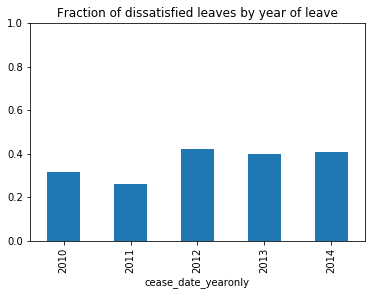

In [491]:
# Plot as a bar chart
showbyyear.plot(kind = 'bar', ylim = (0,1), title = 'Fraction of dissatisfied leaves by year of leave', legend = False)

No very clear trend. If any, a slighthly upward one.

## Conclusion

After doing extensive data cleaning, we created three charts from which we concluded the following:
* People in the earlier stages of their career leave dissatisfied in 30-40% of cases. In later career stages, this grows to around 50%.
* There is a significant difference though between the two institues: leaving out of dissatisfaction is much more common at DETE then at TAFE. Up to over 60% for 'Established' employees at DETE.
* There is no very clear trend visible. It looks like it went up slightly over the years, but it is not very significant.
